# Cálculo de Beta de varias compañías#

*Una de las ventajas de Python es su capacidad de cálculo en grandes volúmenes de datos en espacios de tiempo muy corto. Vamos a ver cómo en cuestión de minutos podemos descargar de la página de Yahoo Finance todos los valores del Ibex35, y todos sus precios de cierre en los últimos 5 años (podríamos incluso más, o acotar fechas concretas)*

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [82]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [83]:
import yfinance as yf

*En primer lugar, vamos a extraer los símbolos de nuestros valores, así no necesitamos escribirlos a mano, sino que estarán contenido es un DataFrame.*

*Mediante pandas.read podemos leer todo tipo de archivos: excel, csv, html... es una herramienta muy vérsatil para la importación de datos en Python.*

*En este caso, nos hemos ido a la página de Yahoo Finance, después hemos buscado IBEX35, y posteriormente hemos selecionado componentes. Una vez que tenemos esta página en el navegador, copiamos la dirección y pegamos directamente en Python después de la función entre paréntesis y entrecomillado*

In [85]:
Ibex_empresas = pd.read_html('https://es.finance.yahoo.com/quote/%5EIBEX/components/')[0]
Ibex_empresas

,Símbolo,Nombre de la empresa,Último precio,Cambio,Cambio de %,Volumen
0,ITX.MC,"Industria de Diseño Textil, S.A.",2791,-4,"-0,14%",2.574.706
1,MTS.MC,ArcelorMittal,2438,-6,"-0,25%",356.221
2,TEF.MC,"Telefónica, S.A.",38180,120,"+0,32%",12.960.041
3,BBVA.MC,"Banco Bilbao Vizcaya Argentaria, S.A.",45385,205,"+0,45%",14.852.148
4,BKT.MC,"Bankinter, S.A.",588,3,"+0,48%",2.209.946
5,ACX.MC,"Acerinox, S.A.",1129,6,"+0,49%",487.343
6,PHM.MC,"Pharma Mar, S.A.",9720,50,"+0,52%",158.198
7,COL.MC,"Inmobiliaria Colonial, SOCIMI, S.A.",826,-5,"-0,54%",529.948
8,MRL.MC,"MERLIN Properties SOCIMI, S.A.",908,6,"+0,67%",739.093
9,ENG.MC,"Enagás, S.A.",1866,-12,"-0,67%",885.717


*Creamos ahora la lista que luego nos servirá para extraer todos los valores del Yahoo Finance, y le añadimos el código del Ibex, ya que necesitamos los precios de cierre del índice también para calcular las Betas*

In [86]:
simbolos = Ibex_empresas['Símbolo'].tolist() + ['^IBEX']
data = yf.download(simbolos, period='5y', auto_adjust=True)

[*********************100%***********************]  31 of 31 completed


*En segundos hemos extraído la información de los últimos 5 años de 31 valores. Aunque el Ibex35 tiene 35 valores, a lo largo de estos últios 5 años algunos valores han salido fuera de este índice, entrando nuevos, por lo que Python al llamar al símbolo puede que ya no exista y por ello no puede importar los datos*

In [58]:
data

Close                                                        \
               ACS.MC     ACX.MC     AENA.MC     AMS.MC      ANA.MC BBVA.MC   
Date                                                                          
2020-10-08  24.728733   6.921147  120.900002  50.240002   97.900002  2.4350   
2020-10-09  24.217241   6.890882  120.599998  50.139999   96.449997  2.3900   
2020-10-12  23.833620   6.830353  120.699997  49.209999   98.449997  2.3520   
2020-10-13  23.095890   6.684704  116.699997  48.410000   97.099998  2.2580   
2020-10-14  23.499182   6.769824  120.800003  47.340000   97.599998  2.2680   
...               ...        ...         ...        ...         ...     ...   
2021-03-31  28.260000  11.125000  138.300003  60.380001  142.899994  4.4260   
2021-04-01  28.219999  11.035000  138.000000  60.500000  144.100006  4.4455   
2021-04-06  27.920000  11.100000  139.100006  60.820000  137.100006  4.5265   
2021-04-07  28.020000  11.235000  138.199997  59.939999  138.199997  4.5180   
2021-04-08  27.770000  11.260000  139.449997  60.060001  139.100006  4.4635   

                                                ...  Volume                   \
              BKT.MC CABK.MC    CLNX.MC COL.MC  ... NTGY.MC  PHM.MC   REE.MC   
Date                                            ...                            
2020-10-08  3.784409  1.7860  53.006153  7.295  ...  752243  132606   766395   
2020-10-09  3.654595  1.7475  52.686359  7.220  ...  856505  220789  1164841   
2020-10-12  3.599102  1.7080  52.706348  7.120  ...  678425  137078  1326192   
2020-10-13  3.418751  1.6250  53.525822  6.945  ...  796595  208523  1384357   
2020-10-14  3.435597  1.6595  53.086102  6.765  ...  913855  158585  1118767   
...              ...     ...        ...    ...  ...     ...     ...      ...   
2021-03-31  5.920000  2.6390  45.478668  8.255  ...  885676   82918  3249524   
2021-04-01  5.852000  2.6000  44.189999  8.275  ...  545524   73920  1231941   
2021-04-06  5.802000  2.5980  44.419998  8.305  ...  678403  108495  2786916   
2021-04-07  5.848000  2.6170  42.340000  8.300  ...  544161  110190  2341517   
2021-04-08  5.786000  2.5590  42.139999  8.270  ...  110535  106789   380625   

                                                                               
             REP.MC    SAB.MC    SAN.MC  SGRE.MC    TEF.MC  VIS.MC      ^IBEX  
Date                                                                           
2020-10-08  9894617  36087867  48935255  1069736  13135643   74602  202093000  
2020-10-09  9226230  35855478  66656428  1092663  13378925  150524  182746300  
2020-10-12  5167901  36084174  38805814   965308  20745925  115949  167258200  
2020-10-13  6443718  49659055  44692023  1349016  19531108  122243  205874300  
2020-10-14  7871379  46997978  43728397  3699418   9068124  105838  178694400  
...             ...       ...       ...      ...       ...     ...        ...  
2021-03-31  5721863  40345950  44093608  2147633  24132557   72855  265542300  
2021-04-01  5111655  30084389  26423239  1130852  15157043   86884  150979000  
2021-04-06  5603261  44336977  42587454  1703080  32004354  101092  201717300  
2021-04-07  3494995  22517116  41147963  1646325  21812383   56569  137394800  
2021-04-08  1841289  18540303  13068676   341159   5026726   41470   71299281  

[127 rows x 155 columns]

*Ahora vamos a calcular Beta en menos pasos*

*1.Calculamos la rentabilidad con la columna "Close"*

*2.Calculamos la beta*

*3.Visualizamos datos, en realidad queremos la última columna traspuesta. Si visualizamos "beta" obtendremos un DataFrame con 31 filas y 31 columnas, pero solo nos interesa la última columna, a la que vamos a llamar "Beta" y trasponer para que sea más visual.*

De esta manera hemos obtenido un DataFrame que nos ha calculado las Betas de 31 compañías del Ibex35, basandose en los precios de cierre de los últimos 5 años, y apenas hemos tardado unos minutos*

In [89]:
renta = np.log(1 + data.loc[:,'Close'].pct_change()).dropna(how='all')
beta = renta.cov().div(renta.var())
beta['^IBEX'].head(20).to_frame('Beta').T

,ACS.MC,ACX.MC,AENA.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CLNX.MC,COL.MC,ELE.MC,ENG.MC,FER.MC,GRF.MC,IAG.MC,IBE.MC,ITX.MC,MAP.MC,MEL.MC,MRL.MC
Beta,1.18078,0.881757,0.939443,1.007001,0.832401,1.471846,1.11204,1.329306,0.505563,0.791369,0.628855,0.623947,0.883743,0.47683,1.65938,0.71537,0.884729,1.032803,1.185017,0.774573


*A continuación vamos a crear una función que nos permita ver la ver la relación entre el valor y el Ibex, en este caso tendremos que ir sustituyendo el valor manualmente para ver el gráfico, he escogido Amadeus porque tiene una Beta prácticamente neutra pero podemos elegir cualquiera sustituyendo el símbolo*

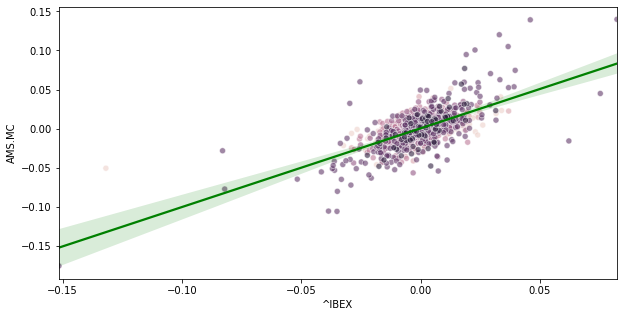

In [91]:
def plot_regression(renta, asset):
    plt.figure(figsize=(10,5))
    sns.scatterplot('^IBEX', asset, data=renta, hue=renta.index.year, alpha=0.6, legend=False)
    sns.regplot('^IBEX', asset, data=renta, scatter=False, color='green')

plot_regression(renta, 'AMS.MC')

*En la gráfica siguiente podemos ver claramente el comportamiento de ambas como es prácticamente idénticos*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E28DFD850>],
      dtype=object)

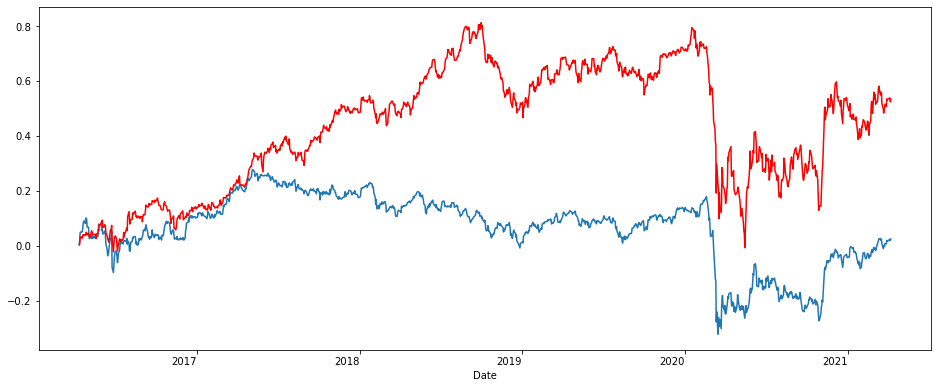

In [92]:
renta['^IBEX'].cumsum().plot(subplots=True,figsize=(16,7))
renta['AMS.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'red')

*Podemos ver varios valores en una misma gráfica*

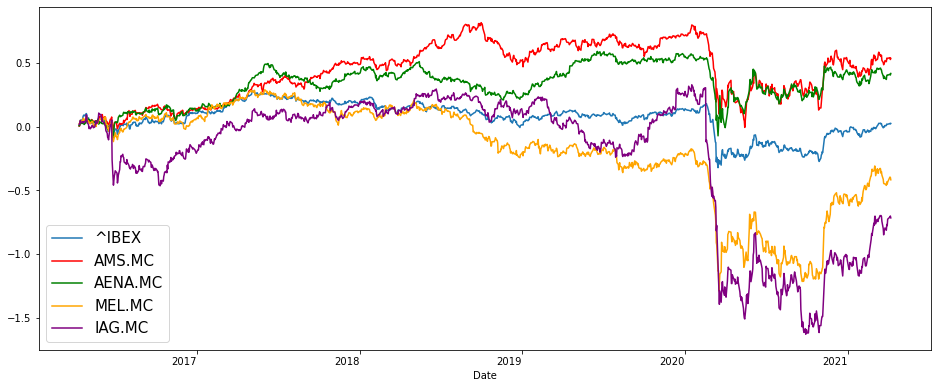

In [98]:
renta['^IBEX'].cumsum().plot(subplots=True,figsize=(16,7))
renta['AMS.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'red')
renta['AENA.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'green')
renta['MEL.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'orange')
renta['IAG.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'purple')
plt.legend(loc = 'best', fontsize = 15)